# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Overal Summary :

   #### City Temperature vs. Latitude:
            - Max Temperature of cities peak at the Equator (lat =0) and gradually fall with latitude moving towards 
              90 and -90 degrees.
            - CityTemperature in Northern Hemisphere have strong positive correlation between Temperature and Latitude 
              with r value -0.73. 
            - CityTemperature in Southern Hemisphere have moderate positive correlation between Temperature and Latitude
              with r value -0.47. 
            - Temperature increases with decrease in latitude from 90 to 0 in Northern Hemisphere and decreases with 
              decrease in latitude in Southern Hemisphere.
            - Cities falling under latitude (10 to 30) and latitude (-35 to 0) seem to be experiencing pleasent temperature.
  #### City Humidity vs. Latitude:
             - R value shows that there is a weak correlation between Humidity and Latitude on the Northerns Hemisphere  
               accounting for only 13% of the data.                     
             - Northern Hemisphere (Latitude 40-60) does seem to experience greater Humidity which can be realted to other 
               factors independent of Latitude.
   #### City Cloudiness vs. Latitude:         
            - Shows that there is a very weak correlation between Cloudiness and Latitude which is explained by 
              LR equation acounting for only 2% variance in the data.
   #### City Wind Speed vs. Latitude: 
            - Shows that there is no correlation between latitude and windspeed.
            - Most cities in Northern Hemisphere have wind speed 0 to 20 mph while in Southern Hemisphere have 
              very low wind speed of 0-10 mph.
              
#### Note: Detailed observation is provided with the plot

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from requests.utils import requote_uri

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [3]:
#Save config Information
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

url = base_url + f"appid={weather_api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# counter for City Index
count=1 
# Counter for number of sets to be created
sets =1 

#Intializing the lists to hold values
max_temp = []
city_name = []
city_lat = []
city_lng = []
city_humidity = []
city_cloudiness = []
city_windspeed = []
country = []
city_date = []

print("Beginning Data Retrieval\n -----------------------------")

for city in cities:
    
    # Build Final query URL 
    final_url = requote_uri(f"{url}{city}") 
    

    #Make API calls to each city
    response = requests.get(final_url).json()
    #print(final_url)

    print(f'Processing Record {count} of Set {sets} | {city}')

    #Since some data may be missing , use try-except to skip any that are missing a data point.
    try:       
        #Fetching 'weather data' from the 'json resonse' 
        city_name.append(response['name'])
        city_lat.append(response['coord']['lat'])
        city_lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        city_humidity.append(response['main']['humidity'])
        city_cloudiness.append(response['clouds']['all'])
        city_windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        city_date.append(response['dt'])                      
        
    except KeyError:
        print("City not found. Skipping...")
            
    count+=1  #increment city index after missing cities
    
    #Set counter for number of sets to return
    if count % 50 == 0:
        sets+=1
        
#Printing end of processing
print('''-----------------------------
Data Retrieval Complete      
-----------------------------''')   

Beginning Data Retrieval
 -----------------------------
Processing Record 1 of Set 1 | kholtoson
Processing Record 2 of Set 1 | galiwinku
City not found. Skipping...
Processing Record 3 of Set 1 | thunder bay
Processing Record 4 of Set 1 | najran
Processing Record 5 of Set 1 | illapel
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | kavieng
Processing Record 8 of Set 1 | teya
Processing Record 9 of Set 1 | itarema
Processing Record 10 of Set 1 | eslamshahr
Processing Record 11 of Set 1 | barawe
City not found. Skipping...
Processing Record 12 of Set 1 | muzaffarnagar
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | tura
Processing Record 15 of Set 1 | katsuura
Processing Record 16 of Set 1 | astana
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | altay
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | waitati
Processin

Processing Record 182 of Set 4 | samusu
City not found. Skipping...
Processing Record 183 of Set 4 | palatka
Processing Record 184 of Set 4 | inuvik
Processing Record 185 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 186 of Set 4 | chicama
Processing Record 187 of Set 4 | nizhniy odes
Processing Record 188 of Set 4 | atasu
Processing Record 189 of Set 4 | nuristan
Processing Record 190 of Set 4 | santa lucia
Processing Record 191 of Set 4 | charlestown
Processing Record 192 of Set 4 | ilulissat
Processing Record 193 of Set 4 | clarence town
Processing Record 194 of Set 4 | cajamarca
Processing Record 195 of Set 4 | straseni
Processing Record 196 of Set 4 | cintalapa
Processing Record 197 of Set 4 | acari
Processing Record 198 of Set 4 | chapais
Processing Record 199 of Set 4 | solnechnyy
Processing Record 200 of Set 5 | mount gambier
Processing Record 201 of Set 5 | meulaboh
Processing Record 202 of Set 5 | bilibino
Processing Record 203 of Set 5 | kysyl-syr
Proc

Processing Record 366 of Set 8 | aksu
Processing Record 367 of Set 8 | pedasi
Processing Record 368 of Set 8 | aix-les-bains
Processing Record 369 of Set 8 | hualmay
Processing Record 370 of Set 8 | port augusta
Processing Record 371 of Set 8 | inongo
Processing Record 372 of Set 8 | saint george
Processing Record 373 of Set 8 | alice springs
Processing Record 374 of Set 8 | turtkul
City not found. Skipping...
Processing Record 375 of Set 8 | hobyo
Processing Record 376 of Set 8 | ostrovnoy
Processing Record 377 of Set 8 | bandarbeyla
Processing Record 378 of Set 8 | salalah
Processing Record 379 of Set 8 | vila do maio
Processing Record 380 of Set 8 | bengkalis
City not found. Skipping...
Processing Record 381 of Set 8 | boyolangu
Processing Record 382 of Set 8 | boras
Processing Record 383 of Set 8 | katherine
Processing Record 384 of Set 8 | montepuez
Processing Record 385 of Set 8 | cairns
Processing Record 386 of Set 8 | yeppoon
Processing Record 387 of Set 8 | mugan
Processing Re

Processing Record 551 of Set 12 | jumla
Processing Record 552 of Set 12 | astoria
Processing Record 553 of Set 12 | mrirt
City not found. Skipping...
Processing Record 554 of Set 12 | ponta delgada
Processing Record 555 of Set 12 | yar-sale
Processing Record 556 of Set 12 | lolua
City not found. Skipping...
Processing Record 557 of Set 12 | nichinan
Processing Record 558 of Set 12 | santa marta
Processing Record 559 of Set 12 | roald
Processing Record 560 of Set 12 | nesbyen
Processing Record 561 of Set 12 | nioro
Processing Record 562 of Set 12 | xingyi
Processing Record 563 of Set 12 | gizo
Processing Record 564 of Set 12 | nikolsk
Processing Record 565 of Set 12 | husavik
Processing Record 566 of Set 12 | farmington
Processing Record 567 of Set 12 | katha
City not found. Skipping...
Processing Record 568 of Set 12 | armacao de pera
Processing Record 569 of Set 12 | gazanjyk
Processing Record 570 of Set 12 | paita
Processing Record 571 of Set 12 | tual
Processing Record 572 of Set 12

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data = pd.DataFrame({
                            "City":city_name,
                            "Lat":city_lat,
                            "Lng":city_lng,
                            "Max Temp(F)":max_temp,
                            "Humidity":city_humidity,
                            "Cloudiness":city_cloudiness,
                            "Wind Speed":city_windspeed,
                            "Country":country,
                            "Date":city_date
                            })

#Save data in .csv file format
city_data.to_csv(output_data_file , index=False , encoding="utf-8")

#Displaying the Data
city_data

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Kholtoson,50.2981,103.3097,2.53,87,0,4.25,RU,1612710058
1,Thunder Bay,48.4001,-89.3168,-15.00,58,75,13.80,CA,1612710058
2,Najrān,17.4924,44.1277,73.40,31,35,4.61,SA,1612709590
3,Illapel,-31.6308,-71.1653,75.76,38,0,6.42,CL,1612710058
4,Rikitea,-23.1203,-134.9692,77.05,73,92,10.58,PF,1612710059
...,...,...,...,...,...,...,...,...,...
556,Coquimbo,-29.9533,-71.3436,64.40,72,90,2.30,CL,1612710019
557,Niquelândia,-14.4739,-48.4597,70.83,93,100,4.07,BR,1612710178
558,Peravurani,10.3000,79.1833,74.73,71,47,12.77,IN,1612710178
559,Ciudad de Allende,25.2833,-100.0167,63.00,41,1,11.50,MX,1612710178


In [6]:
#Statistical Analysis of city data
round(city_data.describe(),2)

,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Date
count,561.00,561.00,561.00,561.0,561.00,561.00,5.610000e+02
mean,19.68,19.29,50.06,72.2,55.03,8.91,1.612710e+09
std,33.52,92.74,33.53,19.0,39.37,6.41,1.827400e+02
min,-54.80,-179.17,-45.99,10.0,0.00,0.81,1.612709e+09
25%,-8.47,-65.79,27.00,62.0,14.00,4.12,1.612710e+09
50%,26.54,25.57,59.67,76.0,72.00,7.31,1.612710e+09
75%,46.43,102.35,77.79,86.0,90.00,12.41,1.612710e+09
max,78.22,179.32,102.76,100.0,100.00,46.04,1.612710e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

#### Note: This part of script will take care of Humidity conditions over 100 if there is any in the future.

In [7]:
#Finding rows with humity value greater than 100
Humidity_over100_df = city_data[city_data['Humidity']>100]
Humidity_over100_df

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date


##### Note: There are no cities with Humidy greater than 100%

In [8]:
#  Get the indices of cities that have humidity over 100%.
# Only if there are cities with humidy > 100%
index = Humidity_over100_df.index
index

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(index , inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Kholtoson,50.2981,103.3097,2.53,87,0,4.25,RU,1612710058
1,Thunder Bay,48.4001,-89.3168,-15.00,58,75,13.80,CA,1612710058
2,Najrān,17.4924,44.1277,73.40,31,35,4.61,SA,1612709590
3,Illapel,-31.6308,-71.1653,75.76,38,0,6.42,CL,1612710058
4,Rikitea,-23.1203,-134.9692,77.05,73,92,10.58,PF,1612710059
...,...,...,...,...,...,...,...,...,...
556,Coquimbo,-29.9533,-71.3436,64.40,72,90,2.30,CL,1612710019
557,Niquelândia,-14.4739,-48.4597,70.83,93,100,4.07,BR,1612710178
558,Peravurani,10.3000,79.1833,74.73,71,47,12.77,IN,1612710178
559,Ciudad de Allende,25.2833,-100.0167,63.00,41,1,11.50,MX,1612710178


In [10]:
#Statistical Analysis of dropped data set (in case there are outliers)
round(clean_city_data.describe(),2)

,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Date
count,561.00,561.00,561.00,561.0,561.00,561.00,5.610000e+02
mean,19.68,19.29,50.06,72.2,55.03,8.91,1.612710e+09
std,33.52,92.74,33.53,19.0,39.37,6.41,1.827400e+02
min,-54.80,-179.17,-45.99,10.0,0.00,0.81,1.612709e+09
25%,-8.47,-65.79,27.00,62.0,14.00,4.12,1.612710e+09
50%,26.54,25.57,59.67,76.0,72.00,7.31,1.612710e+09
75%,46.43,102.35,77.79,86.0,90.00,12.41,1.612710e+09
max,78.22,179.32,102.76,100.0,100.00,46.04,1.612710e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

##### Note: Function to call scatter plot

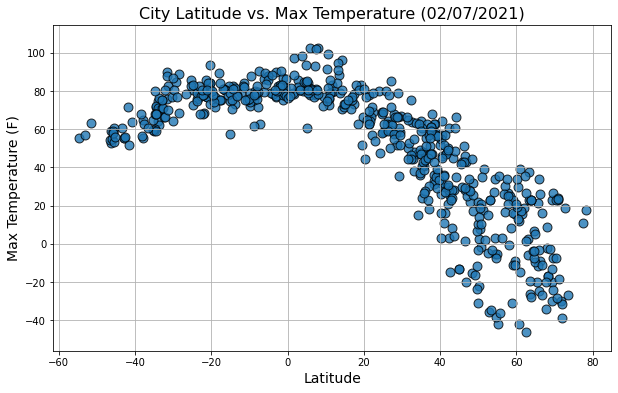

<Figure size 432x288 with 0 Axes>

In [11]:
# Function to Plot Scatter 
def Scatterplot(x,y,title,ylabel,i,j):
    plt.figure(figsize=(10,6))
    plt.scatter(x, y, alpha=.8, s=80, edgecolor="black")
    plt.grid()
    plt.xlabel("Latitude" , fontsize = 14)
    plt.ylabel(ylabel , fontsize = 14)
    plt.title(title , fontsize = 16)
    plt.ylim(min(y)-i,max(y)+j)
    plt.show()
    plt.tight_layout()
    
    

#Set current date for the title
date = time.strftime("%m/%d/%Y")   

#Set X-Axis and Y-axis for plotting    
x_axis = clean_city_data["Lat"]
y_axis_temp = clean_city_data["Max Temp(F)"]

#Set Title
title = f"City Latitude vs. Max Temperature ({date})"
y_label_T = "Max Temperature (F)"

#Set ylim minimum
ymin = 10
ymax = 12

#Call the function for plotting
scatterplot_Lat_Temp =  Scatterplot(x_axis,y_axis_temp ,title,y_label_T,ymin,ymax)   

#Save as png file
plt.savefig("../Images/CityLatVsTemp.png")

### Analysis : 
       - Plot depicts positive realtion of Latitude with temperature .
       - Temperature peaks at the equator (lat = 0 degree)
       - Temperature gradually decreases with latitude moving towards +90 and -90 degrees.
       - Northern Hemispheree experience higher temperature compared to Southern Hemisphere.

## Latitude vs. Humidity Plot

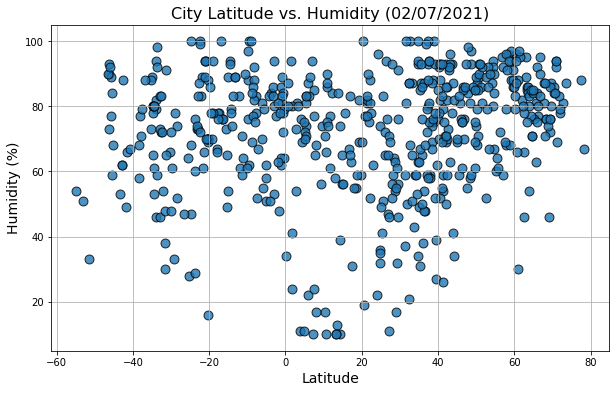

<Figure size 432x288 with 0 Axes>

In [12]:
#Since X-Axis is already set, get Y-axis values for plotting  
y_axis_Humidity = clean_city_data["Humidity"]

#Set Title and Label
title_H = f"City Latitude vs. Humidity ({date})"
y_label_H = "Humidity (%)"

#Set ylim minimum
ymin_H = 5
ymax_H = 5

#Call the function for plotting
scatterplot_Lat_Humi =  Scatterplot(x_axis, y_axis_Humidity , title_H, y_label_H, ymin_H, ymax_H)  

#Save as png file
plt.savefig("../Images/CityLatVsHumidity.png")

### Analysis : 
       - There seems to be a very weak relation between Humidity and Latitude.
       - Northern Hemisphere (Latitude 40-60) does seem to experience greater Humidity which can be realted to other factors
         independent of Latitude.
       

## Latitude vs. Cloudiness Plot

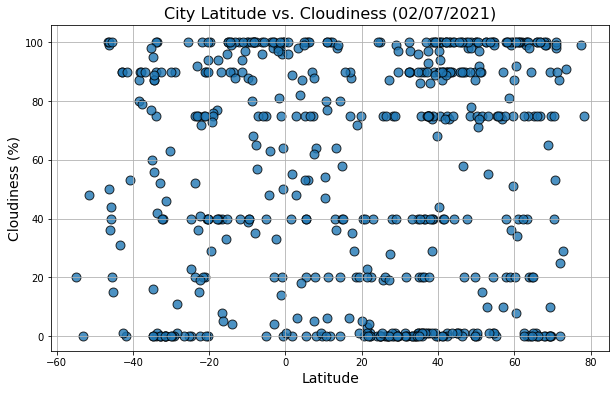

<Figure size 432x288 with 0 Axes>

In [13]:
#Since X-Axis is already set, get Y-axis values for plotting 
y_axis_cloud = clean_city_data["Cloudiness"]

#Set Title and Label
title_C = f"City Latitude vs. Cloudiness ({date})"
y_label_C= "Cloudiness (%)"

#Set ylim minimum
ymin_C = 5
ymax_C = 6

#Call the function for plotting
scatterplot_Lat_Humi =  Scatterplot(x_axis, y_axis_cloud , title_C, y_label_C, ymin_C, ymax_C)  

#Save as png file
plt.savefig("../Images/CityLatVsCloudiness.png")

### Analysis : 
       - Cloudiness seems independent of Latitude.There is no realtion between the two.
      

## Latitude vs. Wind Speed Plot

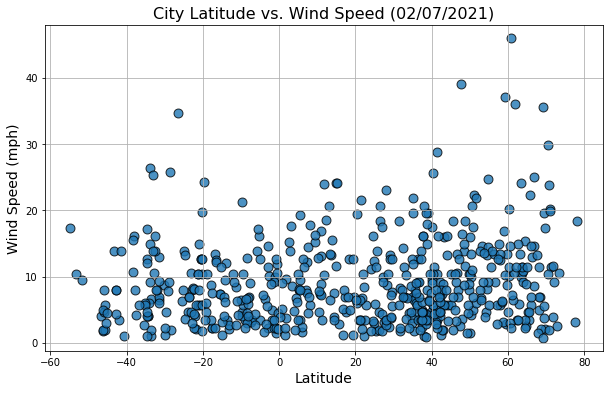

<Figure size 432x288 with 0 Axes>

In [14]:
#Since X-Axis is already set, get Y-axis values for plotting 
y_axis_wind = clean_city_data["Wind Speed"]

#Set Title and Label
title_W = f"City Latitude vs. Wind Speed ({date})"
y_label_W= "Wind Speed (mph)"

#Set ylim minimum
ymin_W = 2
ymax_W = 2

#Call the function for plotting
scatterplot_Lat_Wind =  Scatterplot(x_axis, y_axis_wind , title_W, y_label_W, ymin_W, ymax_W)  

#Save as png file
plt.savefig("../Images/CityLatVsWindSpeed.png")

### Analysis : 
       - Wind Speed also seems independent of Latitude.
       - Although there is a slight increase in cloudiness around latitude 30-70 , there could be a very weak correlation 
         which can be explained with LR model later in the study.

## Linear Regression

##### Note:Creating a dataset for Northern Hemisphere

In [15]:
#Find data for Northern Hemisphere
Northern_hemisphere_df = clean_city_data.loc[clean_city_data["Lat"]>=0 , :]

#Northern Hemisphere Temperature data points
Northern_hemisphere_df

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Kholtoson,50.2981,103.3097,2.53,87,0,4.25,RU,1612710058
1,Thunder Bay,48.4001,-89.3168,-15.00,58,75,13.80,CA,1612710058
2,Najrān,17.4924,44.1277,73.40,31,35,4.61,SA,1612709590
6,Teya,60.3778,92.6267,29.88,96,92,10.04,RU,1612710059
8,Eslāmshahr,35.5605,51.2346,48.20,87,75,4.61,IR,1612710060
...,...,...,...,...,...,...,...,...,...
554,Cabatuan,10.8794,122.4860,76.35,87,100,13.13,PH,1612710178
555,Santa Marinella,42.0345,11.8536,48.99,86,100,7.00,IT,1612710178
558,Peravurani,10.3000,79.1833,74.73,71,47,12.77,IN,1612710178
559,Ciudad de Allende,25.2833,-100.0167,63.00,41,1,11.50,MX,1612710178


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

##### Function to calculate Linar regression values:

In [16]:
#Calculate and Run Linear Regression 
def linarequation(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return rvalue , line_eq , regress_values

##### Note: Function to plot scatter with LR equation

In [17]:
#Scatter plot with LR equation
#Arguments ymin and ymax sets y limit and lmin and lmax set LR annotation on the plot
def LR_Scatterplot(x, y, reg_value,line_eq, title, ylabel, ymin, ymax, lmin, lmax):
    plt.figure(figsize=(10,6))
    plt.scatter(x,y , alpha=.8, s=80, edgecolor="black")
    plt.plot(x,reg_value,"r-")
    plt.annotate(line_eq,(lmin,max(y)+lmax),fontsize=20,color="red")
    plt.title(title, fontsize = 16 , color ='black')
    plt.ylim(min(y) -ymin, max(y) +ymax)
    plt.xlabel("Latitude" , fontsize = 14 ,color ='black')
    plt.ylabel(ylabel , fontsize = 14 , color ='black')
    plt.show()
    plt.tight_layout()

In [18]:
# Find X_Axis and Y_Axis values
x_axis_northern = Northern_hemisphere_df['Lat']
y_axis_northern = Northern_hemisphere_df['Max Temp(F)']

#Call function to calculate Line equation and R vlaue
rvalue_NT , line_eq_NT, regress_values_NT= linarequation(x_axis_northern,y_axis_northern)

#Print values to display
print(f'Linear R Equation : {line_eq_NT}')
print(f"The r-value is: {round(rvalue_NT**2,2)}")

Linear R Equation : y = -1.51x + 97.33
The r-value is: 0.73


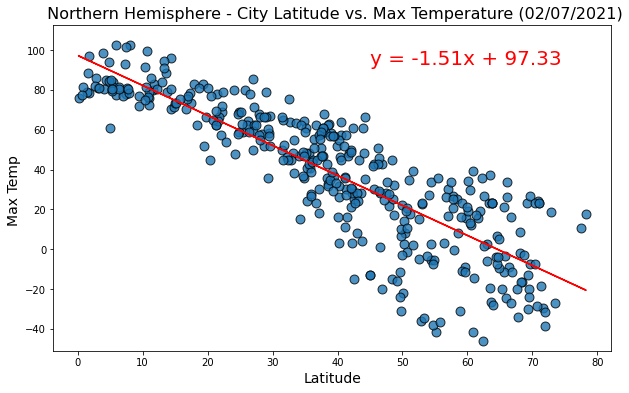

<Figure size 432x288 with 0 Axes>

In [19]:
#plotting scatter Northern Hemisphere - Max Temp vs. Latitude Linear Regression
#Set Title and Label for the pLot    
title_NT = f" Northern Hemisphere - City Latitude vs. Max Temperature ({date})"
ylabel_NT = "Max Temp "

#Set ylim minimum
ymin_NT = 5
ymax_NT = 10

#set annotation limit
lmin_NT =45
lmax_NT =-10

#Call the function for plotting
scatterplot_NH_Temp =  LR_Scatterplot(x_axis_northern, 
                                      y_axis_northern , 
                                      regress_values_NT, 
                                      line_eq_NT,
                                      title_NT, 
                                      ylabel_NT, 
                                      ymin_NT, ymax_NT,
                                      lmin_NT,lmax_NT)  

#Save as png file
plt.savefig("../Images/NorthHem_LatVsTemp_LR.png")

#### Analysis : The r-value: 0.73
         - Shows that there is a strong positive correlation between Temperature and Latitude on the Northern Hemisphere.
         - r value .73 means 73% of variation in data has been accounted for by linear regression equation.
         - Plot also depicts Temperature peaks at the 'Equater' and falls gradually decreases towards the North Pole.
   #### Conclusion : 
         - Cities falling under the Latitude 10 to 30 experience pleasent temperature whicle cities falling above 
           Lat 35 have cold weather.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

##### Note:Creating a dataset for Southern Hemisphere

In [20]:
#Find data for Southern Hemisphere
Southern_hemisphere_df = clean_city_data.loc[clean_city_data["Lat"]<=0 , :]

#Southern Hemisphere Temperature data points
Southern_hemisphere_df

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date
3,Illapel,-31.6308,-71.1653,75.76,38,0,6.42,CL,1612710058
4,Rikitea,-23.1203,-134.9692,77.05,73,92,10.58,PF,1612710059
5,Kavieng,-2.5744,150.7967,82.87,77,33,10.16,PG,1612709648
7,Itarema,-2.9248,-39.9167,89.78,53,4,14.65,BR,1612710060
10,Mataura,-46.1927,168.8643,52.79,90,99,1.83,NZ,1612710061
...,...,...,...,...,...,...,...,...,...
547,Amahai,-3.3333,128.9167,80.55,83,100,2.91,ID,1612710176
548,Poso,-1.3959,120.7524,82.99,78,100,3.47,ID,1612710176
550,Coracora,-15.0333,-73.7833,57.51,54,100,3.22,PE,1612710176
556,Coquimbo,-29.9533,-71.3436,64.40,72,90,2.30,CL,1612710019


In [21]:
# Find X_Axis and Y_Axis values
x_axis_South = Southern_hemisphere_df['Lat']
y_axis_South = Southern_hemisphere_df['Max Temp(F)']

#Call function to calculate Line equation and R vlaue
rvalue_ST , line_eq_ST ,regress_values_ST = linarequation(x_axis_South,y_axis_South)

#Print values to display
print(f'Linear R Equation : {line_eq_ST}')
print(f"The r-value is: {round(rvalue_ST**2,2)}")

Linear R Equation : y = 0.48x + 85.23
The r-value is: 0.47


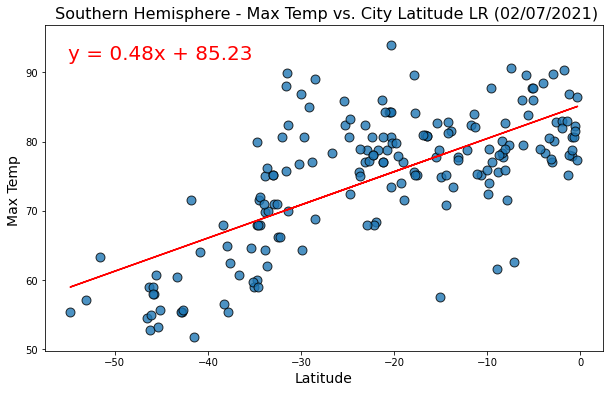

<Figure size 432x288 with 0 Axes>

In [22]:
#plotting scatter Southern Hemisphere - Max Temp vs. Latitude with Linear Regression
#Set Title and Label for the pLot  
title_ST = f" Southern Hemisphere - Max Temp vs. City Latitude LR ({date})"
ylabel_ST = "Max Temp "

#Set ylim minimum
ymin_ST = 2
ymax_ST = 3

#set annotation limit
lmin_ST =-55
lmax_ST =-2

#Call the function for plotting
scatterplot_SH_Temp =  LR_Scatterplot(x_axis_South, 
                                      y_axis_South , 
                                      regress_values_ST, 
                                      line_eq_ST,
                                      title_ST, 
                                      ylabel_ST, 
                                      ymin_ST, ymax_ST,
                                      lmin_ST , lmax_ST )  

#Save as png file
plt.savefig("../Images/southHem_LatVsTemp_LR.png")

#### Analysis : The r-value: 0.47
                   - Shows that there is a moderate positive correlation between Temperature and Latitude on the 
                     Southern Hemisphere
                   - LR model is accounting for 41% of the data which can be seen in the plot.
                   - Temperature decrease as we move towards the South pole.
  ##### Conclusion: 
                   - Cities in Southern Hemisphere Close to the Equtor (lat 0 to -30) might experience pleasent temperature,
                     while cities away from the 'Equator' (Lat <-30) experience lower Temperature.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [23]:
# Find X_Axis and Y_Axis values
x_axis_NH_Humid = Northern_hemisphere_df['Lat']
y_axis_NH_humid = Northern_hemisphere_df['Humidity']

#Call function to calculate Line equation and R vlaue
rvalue_N_Humid , line_eq_N_Humid, regress_values_N_Humid= linarequation(x_axis_NH_Humid,y_axis_NH_humid)

#Print values to display
print(f'Linear R Equation : {line_eq_N_Humid}')
print(f"The r-value is: {round(rvalue_N_Humid**2,3)}")

Linear R Equation : y = 0.37x + 57.22
The r-value is: 0.129


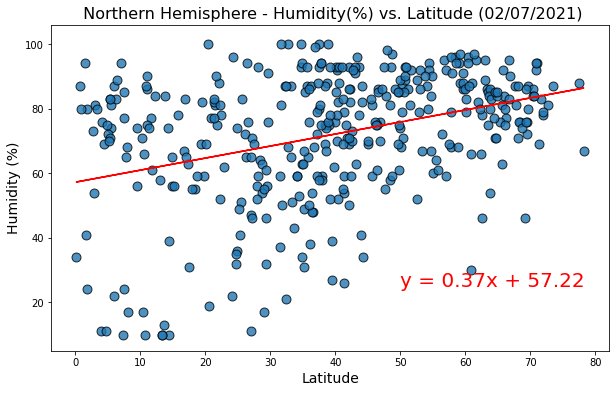

<Figure size 432x288 with 0 Axes>

In [24]:
#plotting scatter Northern Hemisphere - Humidity (%) vs. Latitude with Linear Regression
#Set Title and Label for the pLot  
title_NHumid = f" Northern Hemisphere - Humidity(%) vs. Latitude ({date})"
ylabel_NHumid = "Humidity (%)"

#Set ylim minimum
ymin_NHumid = 5
ymax_NHumid = 6

#set annotation limit
lmin_NHumid =50
lmax_NHumid =-75

#Call the function for plotting
scatterplot_N_Humid =  LR_Scatterplot(x_axis_NH_Humid, 
                                      y_axis_NH_humid , 
                                      regress_values_N_Humid, 
                                      line_eq_N_Humid,
                                      title_NHumid, 
                                      ylabel_NHumid, 
                                      ymin_NHumid, ymax_NHumid,
                                      lmin_NHumid , lmax_NHumid )
#Save as png file
plt.savefig("../Images/NorthHem_LatVsHumidity_LR.png")

#### Analysis : The r-value: 0.13
                   - Shows that there is a very weak correlation between Humidity and Latitude on the Northerns 
                     Hemisphere accounting for only 13% of the data.                     


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [25]:
# Find X_Axis and Y_Axis values
x_axis_SH_Humid = Southern_hemisphere_df['Lat']
y_axis_SH_humid = Southern_hemisphere_df['Humidity']

#Call function to calculate Line equation and R vlaue
rvalue_S_Humid , line_eq_S_Humid, regress_values_S_Humid= linarequation(x_axis_SH_Humid, y_axis_SH_humid)

#Print values to display
print(f'Linear R Equation : {line_eq_S_Humid}')
print(f"The r-value is: {round(rvalue_S_Humid**2,2)}")

Linear R Equation : y = 0.17x + 76.62
The r-value is: 0.02


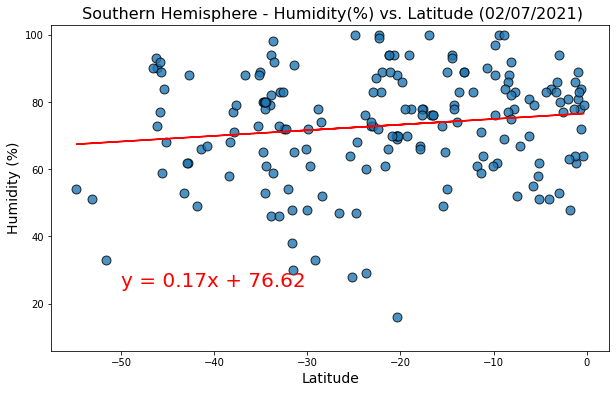

<Figure size 432x288 with 0 Axes>

In [26]:
#plotting scatter Southern Hemisphere - Humidity (%) vs. Latitude with Linear Regression
#Set Title and Label for the pLot  
title_SHumid = f" Southern Hemisphere - Humidity(%) vs. Latitude ({date})"
ylabel_SHumid = "Humidity (%)"

#Set ylim minimum
ymin_SHumid = 10
ymax_SHumid = 3

#set annotation limit
lmin_SHumid =-50
lmax_SHumid =-75

#Call the function for plotting
scatterplot_S_Humid =  LR_Scatterplot(x_axis_SH_Humid, 
                                      y_axis_SH_humid , 
                                      regress_values_S_Humid, 
                                      line_eq_S_Humid,
                                      title_SHumid, 
                                      ylabel_SHumid, 
                                      ymin_SHumid, ymax_SHumid,
                                      lmin_SHumid , lmax_SHumid )
#Save as png file
plt.savefig("../Images/southHem_LatVsHumidity_LR.png")

#### Analysis : The r-value: 0.02
                - Shows that there is a very weak or almost no correlation between Humidity and Latitude
                - There is a weak inclreasein humidity towards the Equator which is explained by Linear regration equation.
                - Most Cities have Humidity over 60% which could be related to other factors independent of Latitude.
               

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [27]:
# Find X_Axis and Y_Axis values
x_axis_NH_cloud = Northern_hemisphere_df['Lat']
y_axis_NH_cloud = Northern_hemisphere_df['Cloudiness']

#Call function to calculate Line equation and R vlaue
rvalue_N_cloud , line_eq_N_cloud, regress_values_N_cloud= linarequation(x_axis_NH_cloud,y_axis_NH_cloud)

#Print values to display
print(f'Linear R Equation : {line_eq_N_cloud}')
print(f"The r-value is: {round(rvalue_N_cloud**2,2)}")

Linear R Equation : y = 0.27x + 42.19
The r-value is: 0.02


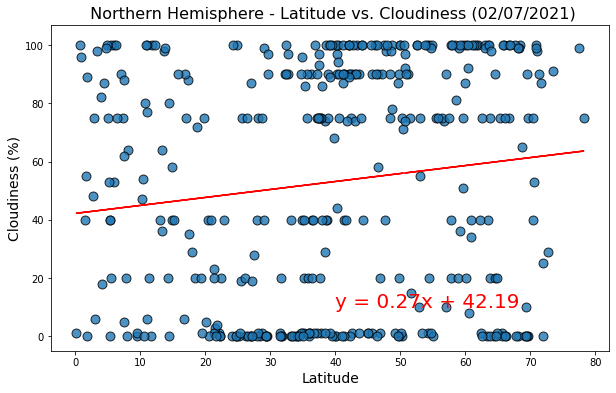

<Figure size 432x288 with 0 Axes>

In [28]:
#plotting scatter Northern Hemisphere - Cloudiness (%) vs. Latitude with Linear Regression
#Set Title and Label for the pLot  
title_Ncloud = f" Northern Hemisphere - Latitude vs. Cloudiness ({date})"
ylabel_Ncloud = "Cloudiness (%)"

#Set ylim minimum
ymin_Ncloud = 5
ymax_Ncloud = 7

#set annotation limit
lmin_Ncloud = 40
lmax_Ncloud =-90

#Call the function for plotting
scatterplot_N_cloud =  LR_Scatterplot(x_axis_NH_cloud, 
                                      y_axis_NH_cloud , 
                                      regress_values_N_cloud, 
                                      line_eq_N_cloud,
                                      title_Ncloud, 
                                      ylabel_Ncloud, 
                                      ymin_Ncloud, ymax_Ncloud,
                                      lmin_Ncloud , lmax_Ncloud )
#Save as png file
plt.savefig("../Images/NorthHem_LatVsCloudiness_LR.png")

#### Analysis : The r-value: 0.02
                   - Shows that there is a very weak correlation between Cloudiness and Latitude acoounting for only 2% 
                     of the data
                   - Which explains why cities falling in latitude 35 to 75 degrees have more cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [29]:
# Find X_Axis and Y_Axis values
x_axis_SH_cloud = Southern_hemisphere_df['Lat']
y_axis_SH_cloud = Southern_hemisphere_df['Cloudiness']

#Call function to calculate Line equation and R vlaue
rvalue_S_cloud , line_eq_S_cloud, regress_values_S_cloud = linarequation(x_axis_SH_cloud, y_axis_SH_cloud)

#Print values to display
print(f'Linear R Equation : {line_eq_S_cloud}')
print(f"The r-value is: {round(rvalue_S_cloud**2,2)}")

Linear R Equation : y = 0.65x + 73.62
The r-value is: 0.06


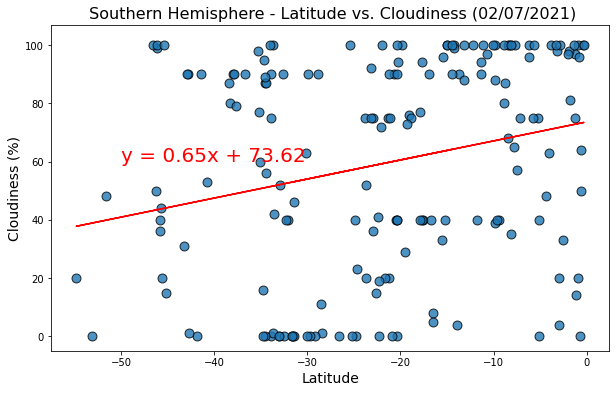

<Figure size 432x288 with 0 Axes>

In [30]:
#plotting scatter Southern Hemisphere - Cloudiness (%) vs. Latitude with Linear Regression
#Set Title and Label for the pLot  
title_Scloud = f" Southern Hemisphere - Latitude vs. Cloudiness ({date})"
ylabel_Scloud = "Cloudiness (%)"

#Set ylim minimum
ymin_Scloud = 5
ymax_Scloud = 7

#set annotation limit
lmin_Scloud = -50
lmax_Scloud =-40

#Call the function for plotting
scatterplot_S_cloud =  LR_Scatterplot(x_axis_SH_cloud, 
                                      y_axis_SH_cloud , 
                                      regress_values_S_cloud, 
                                      line_eq_S_cloud,
                                      title_Scloud, 
                                      ylabel_Scloud, 
                                      ymin_Scloud, ymax_Scloud,
                                      lmin_Scloud , lmax_Scloud )
#Save as png file
plt.savefig("../Images/southHem_LatVsCloudiness_LR.png")

#### Analysis : The r-value: 0.06
                  - Shows that there is a very weak correlation between Cloudiness and Latitude acoounting for only 6% 
                    of the data.
                  - Which explains why cities close to the equator (lat =0)  have more cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [31]:
# Find X_Axis and Y_Axis values
x_axis_NH_wind = Northern_hemisphere_df['Lat']
y_axis_NH_wind= Northern_hemisphere_df['Wind Speed']

#Call function to calculate Line equation and R vlaue
rvalue_N_wind , line_eq_N_wind, regress_values_N_wind= linarequation(x_axis_NH_wind,y_axis_NH_wind)

#Print values to display
print(f'Linear R Equation : {line_eq_N_wind}')
print(f"The r-value is: {round(rvalue_N_wind**2,4)}")

Linear R Equation : y = 0.05x + 7.67
The r-value is: 0.0171


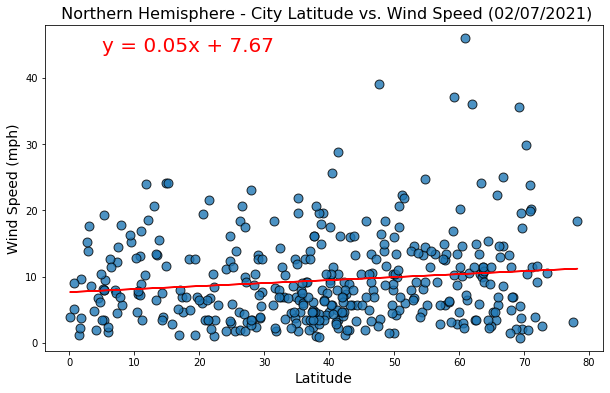

<Figure size 432x288 with 0 Axes>

In [32]:
#plotting scatter Northern Hemisphere - Wind Speed  (mph) vs. Latitude with Linear Regression
#Set Title and Label for the pLot  
title_Nwind = f" Northern Hemisphere - City Latitude vs. Wind Speed ({date})"
ylabel_Nwind = "Wind Speed (mph)"

#Set ylim minimum
ymin_Nwind = 2
ymax_Nwind = 2

#set annotation limit
lmin_Nwind = 5
lmax_Nwind =-2

#Call the function for plotting
scatterplot_N_wind =  LR_Scatterplot(x_axis_NH_wind, 
                                      y_axis_NH_wind , 
                                      regress_values_N_wind, 
                                      line_eq_N_wind,
                                      title_Nwind, 
                                      ylabel_Nwind, 
                                      ymin_Nwind, ymax_Nwind,
                                      lmin_Nwind , lmax_Nwind )
#Save as png file
plt.savefig("../Images/NorthHem_LatVsWindSpeed_LR.png")

#### Analysis : The r-value: 0.0171 
            - Shows that there is a very weak or almost no correlation between windspeed and Latitude.
            - Most cities have wind speed of 0 to 20 mph in the Northern Hemisphere with some outliers.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [33]:
# Find X_Axis and Y_Axis values
x_axis_SH_Wind = Southern_hemisphere_df['Lat']
y_axis_SH_Wind = Southern_hemisphere_df['Wind Speed']

#Call function to calculate Line equation and R vlaue
rvalue_S_Wind , line_eq_S_Wind, regress_values_S_Wind = linarequation(x_axis_SH_Wind, y_axis_SH_Wind)

#Print values to display
print(f'Linear R Equation : {line_eq_S_Wind}')
print(f"The r-value is: {round(rvalue_S_Wind**2,3)}")

Linear R Equation : y = -0.04x + 6.98
The r-value is: 0.009


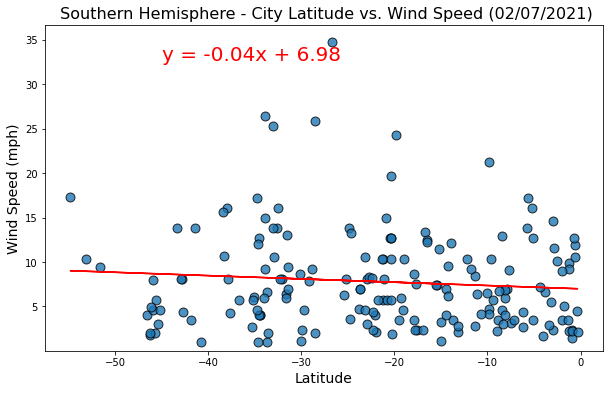

<Figure size 432x288 with 0 Axes>

In [34]:
#plotting scatter Southern Hemisphere - Wind Speed  (mph) vs. Latitude with Linear Regression
#Set Title and Label for the pLot  
title_Swind = f" Southern Hemisphere - City Latitude vs. Wind Speed ({date})"
ylabel_Swind = "Wind Speed (mph)"

#Set ylim minimum 
ymin_Swind = 1
ymax_Swind = 2

#set annotation limit to display LR line
lmin_Swind = -45
lmax_Swind =-2

#Call the function for plotting
scatterplot_S_wind =  LR_Scatterplot(x_axis_SH_Wind, 
                                      y_axis_SH_Wind , 
                                      regress_values_S_Wind, 
                                      line_eq_S_Wind,
                                      title_Swind, 
                                      ylabel_Swind, 
                                      ymin_Swind, ymax_Swind,
                                      lmin_Swind , lmax_Swind )
#Save as png file
plt.savefig("../Images/SouthHem_LatVsWindSpeed_LR.png")

#### Analysis : The r-value : 0.01
                - Shows that there is no correlation between latitude and windspeed.
                - Most cities in Southern Hemisphere have very low wind speed of 0-10 mph.